In [5]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import statistics

#reading csv file
df = pd.read_csv("cleveland_upd.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [8]:
#fetching first 5 records
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [9]:
#printing last 5 samples
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1
302,38,1,2,138,175,0,0,173,0,0.0,0,0,1,0


In [4]:
#no of samples and features of this dataset
df.shape

(303, 14)

In [5]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#statistical info about dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [8]:
#checking distribution of target variable
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

Pictorial Representation

<Axes: >

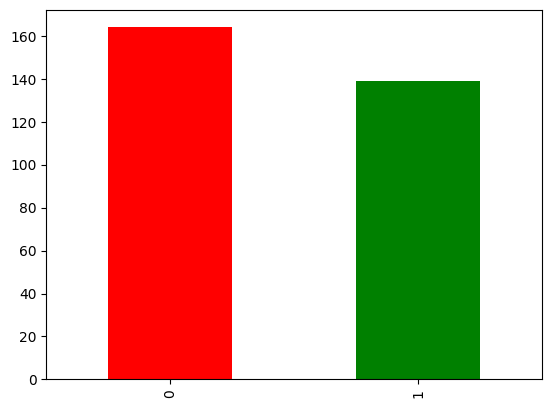

In [9]:
df['target'].value_counts().plot(kind='bar',color=['red','green'])

Age wise Heart Disease

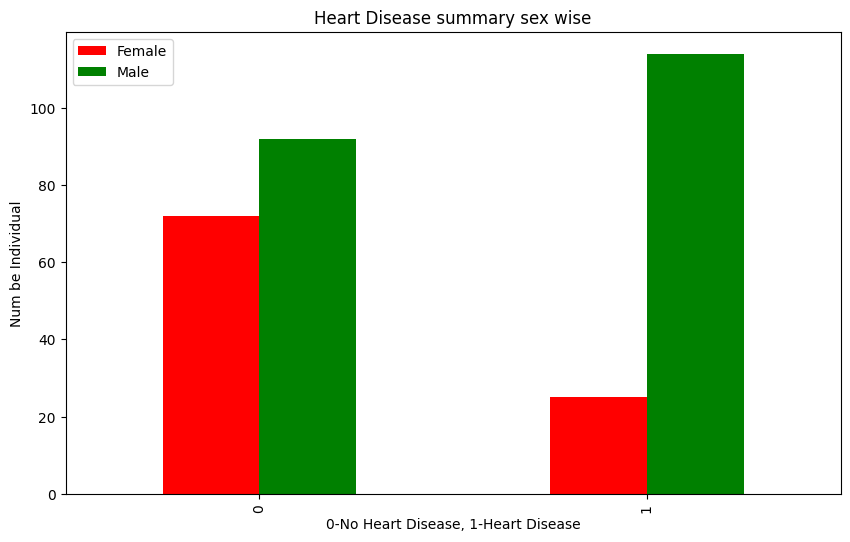

In [10]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6), color=['red', 'green'])
plt.title('Heart Disease summary sex wise')
plt.xlabel('0-No Heart Disease, 1-Heart Disease')
plt.ylabel('Num be Individual')
plt.legend (['Female', 'Male'])


In [4]:
#splitting into features and class label

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('target',axis = 1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [12]:
from collections import Counter
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({0: 135, 1: 107})

**1.KNN** **Classifier**



In [13]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
m1 = 'knn classifier'

k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train_fold, y_train_fold)
    knnpred = knn.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, knnpred)
    fold_accuracy = accuracy_score(y_test_fold, knnpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

knnaccuracy = total_accuracy / k
print("Mean Accuracy =", knnaccuracy)

Accuracy for this fold: 64.51612903225806
Confusion Matrix for Fold:
[[10  3]
 [ 8 10]]
Accuracy for this fold: 64.51612903225806
Confusion Matrix for Fold:
[[13  4]
 [ 7  7]]
Accuracy for this fold: 51.61290322580645
Confusion Matrix for Fold:
[[9 9]
 [6 7]]
Accuracy for this fold: 63.33333333333333
Confusion Matrix for Fold:
[[11  6]
 [ 5  8]]
Accuracy for this fold: 66.66666666666666
Confusion Matrix for Fold:
[[14  1]
 [ 9  6]]
Accuracy for this fold: 60.0
Confusion Matrix for Fold:
[[13  6]
 [ 6  5]]
Accuracy for this fold: 60.0
Confusion Matrix for Fold:
[[12  6]
 [ 6  6]]
Accuracy for this fold: 60.0
Confusion Matrix for Fold:
[[ 8  4]
 [ 8 10]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[16  2]
 [ 7  5]]
Accuracy for this fold: 50.0
Confusion Matrix for Fold:
[[9 8]
 [7 6]]
Mean Accuracy = 61.064516129032256


In [ ]:
# Making Predictions with the data
input_data = np.array([[67,1,3,120,229,0,2,129,1,2.6,1,2,3]])

y_pred = knn.predict(input_data)
print("My Prediction = " , y_pred)

My Prediction =  [1]


**2.Logistic Regression**

In [14]:
#Logistic Regression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
m2 = 'lr classifier'


k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    lr = LogisticRegression()
    lr.fit(X_train_fold,y_train_fold)
    lrpred = lr.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, lrpred)
    fold_accuracy = accuracy_score(y_test_fold, lrpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

lraccuracy = total_accuracy / k
print("Mean Accuracy =", lraccuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for this fold: 90.32258064516128
Confusion Matrix for Fold:
[[12  1]
 [ 2 16]]
Accuracy for this fold: 90.32258064516128
Confusion Matrix for Fold:
[[16  1]
 [ 2 12]]
Accuracy for this fold: 77.41935483870968
Confusion Matrix for Fold:
[[14  4]
 [ 3 10]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[15  2]
 [ 1 12]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[15  0]
 [ 5 10]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[16  3]
 [ 0 11]]
Accuracy for this fold: 73.33333333333333
Confusion Matrix for Fold:
[[16  2]
 [ 6  6]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[12  0]
 [ 4 14]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[17  1]
 [ 3  9]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[14  3]
 [ 3 10]]
Mean Accuracy = 84.80645161290322


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**3.SVM Classifier**

In [ ]:
#SVM
m3 = 'svm classifier'
# Svm = SVC(kernel = 'linear',C=2,probability=True)
# Svm.fit(X_train,y_train)
# Svmpred = Svm.predict(X_test)
# Svmaccuracy = round(accuracy_score(y_test, Svmpred)*100,2)
# print("Accuracy = ",Svmaccuracy)
# print("\nConfusion Matrix")
# cm = confusion_matrix(y_test,Svmpred)
# print(cm)
# print("\nClassification Report as follows")
# print(classification_report(y_test,Svmpred))


k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    Svm = SVC(kernel = 'linear',C=2,probability=True)
    Svm.fit(X_train_fold,y_train_fold)
    Svmpred = Svm.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, Svmpred)
    fold_accuracy = accuracy_score(y_test_fold, Svmpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

svmaccuracy = total_accuracy / k
print("Mean Accuracy =", svmaccuracy)

Accuracy for this fold: 80.64516129032258
Confusion Matrix for Fold:
[[15  1]
 [ 5 10]]
Accuracy for this fold: 80.64516129032258
Confusion Matrix for Fold:
[[13  5]
 [ 1 12]]
Accuracy for this fold: 74.19354838709677
Confusion Matrix for Fold:
[[12  5]
 [ 3 11]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[15  2]
 [ 4  9]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[13  1]
 [ 2 14]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[16  3]
 [ 3  8]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[14  3]
 [ 3 10]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[15  0]
 [ 4 11]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[19  0]
 [ 3  8]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[11  1]
 [ 3 15]]
Mean Accuracy = 82.88172043010752


**4.Decision Tree**

In [15]:
#DT
m4 = 'decision tree'
# dt = DecisionTreeClassifier(criterion='entropy',random_state = 0,max_depth=6)
# dt.fit(X_train,y_train)
# dtpred = dt.predict(X_test)
# dtaccuracy = round(accuracy_score(y_test, dtpred)*100,2)
# print("Accuracy = ",dtaccuracy)
# print("\nConfusion Matrix")
# cm = confusion_matrix(y_test,dtpred)
# print(cm)
# print("\nClassification Report as follows")
# print(classification_report(y_test,dtpred))


k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    dt = DecisionTreeClassifier(criterion='entropy',random_state = 0,max_depth=6)
    dt.fit(X_train_fold,y_train_fold)
    dtpred = dt.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, dtpred)
    fold_accuracy = accuracy_score(y_test_fold, dtpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

dtaccuracy = total_accuracy / k
print("Mean Accuracy =", dtaccuracy)

Accuracy for this fold: 74.19354838709677
Confusion Matrix for Fold:
[[13  3]
 [ 5 10]]
Accuracy for this fold: 77.41935483870968
Confusion Matrix for Fold:
[[14  4]
 [ 3 10]]
Accuracy for this fold: 64.51612903225806
Confusion Matrix for Fold:
[[10  7]
 [ 4 10]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[14  3]
 [ 2 11]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[10  4]
 [ 2 14]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[18  1]
 [ 5  6]]
Accuracy for this fold: 76.66666666666667
Confusion Matrix for Fold:
[[14  3]
 [ 4  9]]
Accuracy for this fold: 70.0
Confusion Matrix for Fold:
[[12  3]
 [ 6  9]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[17  2]
 [ 3  8]]
Accuracy for this fold: 73.33333333333333
Confusion Matrix for Fold:
[[10  2]
 [ 6 12]]
Mean Accuracy = 76.27956989247312


**5.Gaussian NB**

In [16]:
#GaussianNB

m5 = 'gaussian nb'
# nb = GaussianNB()
# nb.fit(X_train,y_train)
# nbpred = nb.predict(X_test)
# nbaccuracy = round(accuracy_score(y_test, nbpred)*100,2)
# print("Accuracy of NB = " , nbaccuracy)
# print("\nConfusion Matrix")
# cm = confusion_matrix(y_test,nbpred)
# print(cm)
# print("\nClassification Report as follows")
# print(classification_report(y_test,nbpred))


k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    nb = GaussianNB()
    nb.fit(X_train_fold,y_train_fold)
    nbpred = nb.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, nbpred)
    fold_accuracy = accuracy_score(y_test_fold, nbpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

nbaccuracy = total_accuracy / k
print("Mean Accuracy =", nbaccuracy)

Accuracy for this fold: 77.41935483870968
Confusion Matrix for Fold:
[[14  2]
 [ 5 10]]
Accuracy for this fold: 77.41935483870968
Confusion Matrix for Fold:
[[13  5]
 [ 2 11]]
Accuracy for this fold: 83.87096774193549
Confusion Matrix for Fold:
[[14  3]
 [ 2 12]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[16  1]
 [ 4  9]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[13  1]
 [ 4 12]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[16  3]
 [ 0 11]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[14  3]
 [ 3 10]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[15  0]
 [ 3 12]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[18  1]
 [ 3  8]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[10  2]
 [ 3 15]]
Mean Accuracy = 83.53763440860214


**6.QDA (QuadraticDiscriminantAnalysis)**

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
m6 = 'qda classifier'
# qda = QuadraticDiscriminantAnalysis()
# qda.fit(X_train, y_train)
# qdapred = qda.predict(X_test)
# accuracy = round(accuracy_score(y_test, qdapred)*100,2)
# print("Accuracy of QDA:", accuracy)
# print("\nConfusion Matrix")
# cm = confusion_matrix(y_test,qdapred)
# print(cm)
# print("\nClassification Report as follows")
# print(classification_report(y_test,qdapred))



k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_fold, y_train_fold)
    qdapred = qda.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, qdapred)
    fold_accuracy = accuracy_score(y_test_fold, qdapred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

qdaaccuracy = total_accuracy / k
print("Mean Accuracy =", qdaaccuracy)


Accuracy for this fold: 77.41935483870968
Confusion Matrix for Fold:
[[13  3]
 [ 4 11]]
Accuracy for this fold: 77.41935483870968
Confusion Matrix for Fold:
[[13  5]
 [ 2 11]]
Accuracy for this fold: 87.09677419354838
Confusion Matrix for Fold:
[[15  2]
 [ 2 12]]
Accuracy for this fold: 73.33333333333333
Confusion Matrix for Fold:
[[14  3]
 [ 5  8]]
Accuracy for this fold: 93.33333333333333
Confusion Matrix for Fold:
[[14  0]
 [ 2 14]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[16  3]
 [ 2  9]]
Accuracy for this fold: 76.66666666666667
Confusion Matrix for Fold:
[[13  4]
 [ 3 10]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[15  0]
 [ 4 11]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[18  1]
 [ 4  7]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[10  2]
 [ 2 16]]
Mean Accuracy = 82.5268817204301


**7.Bagging --> Random Forest Classifier**

In [18]:

from sklearn.ensemble import RandomForestClassifier
m7 = 'rf classifier'
# rf = RandomForestClassifier(n_estimators=5, random_state=2,max_depth=5)
# rf.fit(X_train, y_train)
# rfpred = rf.predict(X_test)
# rfaccuracy = round(accuracy_score(y_test, rfpred)*100,2)
# print("Accuracy of Random Forest : ",rfaccuracy)
# print("\nConfusion Matrix")
# cm = confusion_matrix(y_test,rfpred)
# print(cm)
# print("\nClassification Report as follows")
# print(classification_report(y_test,rfpred))


k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestClassifier(n_estimators=5, random_state=2,max_depth=5)
    rf.fit(X_train_fold, y_train_fold)
    rfpred = rf.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, rfpred)
    fold_accuracy = accuracy_score(y_test_fold, rfpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

rfaccuracy = total_accuracy / k
print("Mean Accuracy =", rfaccuracy)

Accuracy for this fold: 83.87096774193549
Confusion Matrix for Fold:
[[15  1]
 [ 4 11]]
Accuracy for this fold: 64.51612903225806
Confusion Matrix for Fold:
[[12  6]
 [ 5  8]]
Accuracy for this fold: 64.51612903225806
Confusion Matrix for Fold:
[[ 9  8]
 [ 3 11]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[16  1]
 [ 3 10]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[13  1]
 [ 5 11]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[16  3]
 [ 3  8]]
Accuracy for this fold: 76.66666666666667
Confusion Matrix for Fold:
[[13  4]
 [ 3 10]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[15  0]
 [ 6  9]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[16  3]
 [ 2  9]]
Accuracy for this fold: 76.66666666666667
Confusion Matrix for Fold:
[[10  2]
 [ 5 13]]
Mean Accuracy = 77.6236559139785


**8.Adaboost classifier**

In [19]:
m8 = 'adaboost classifier'
# base_classifier = DecisionTreeClassifier(max_depth=6)
# adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=20, random_state=23)
# adaboost_classifier.fit(X_train, y_train)
# boostpred = adaboost_classifier.predict(X_test)
# boostaccuracy = round(accuracy_score(y_test, boostpred)*100,2)
# print("Accuracy:", accuracy)
# print("\nConfusion Matrix")
# cm = confusion_matrix(y_test,boostpred)
# print(cm)
# print("\nClassification Report as follows")
# print(classification_report(y_test,boostpred))

from sklearn.ensemble import AdaBoostClassifier
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    base_classifier = DecisionTreeClassifier(max_depth=6)
    adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=20, random_state=23)
    adaboost_classifier.fit(X_train_fold, y_train_fold)
    boostpred = adaboost_classifier.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, boostpred)
    fold_accuracy = accuracy_score(y_test_fold, boostpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

boostaccuracy = total_accuracy / k
print("Mean Accuracy =", boostaccuracy)

Accuracy for this fold: 87.09677419354838
Confusion Matrix for Fold:
[[15  1]
 [ 3 12]]
Accuracy for this fold: 74.19354838709677
Confusion Matrix for Fold:
[[14  4]
 [ 4  9]]
Accuracy for this fold: 70.96774193548387
Confusion Matrix for Fold:
[[12  5]
 [ 4 10]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[16  1]
 [ 2 11]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[12  2]
 [ 4 12]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[15  4]
 [ 1 10]]
Accuracy for this fold: 76.66666666666667
Confusion Matrix for Fold:
[[13  4]
 [ 3 10]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[15  0]
 [ 4 11]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[16  3]
 [ 3  8]]
Accuracy for this fold: 76.66666666666667
Confusion Matrix for Fold:
[[11  1]
 [ 6 12]]
Mean Accuracy = 80.55913978494623


In [12]:
pip install tensorflow-addons

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 729.9/729.9 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
#Deep Learning Model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


input_layer = Input(shape=(X_train.shape[1],))
d1 = Dense(units=100, activation='relu')(input_layer)
d2 = Dense(units=100, activation='relu')(d1)
d3 = Dense(units=100, activation='relu')(d2)
d4 = Dense(units=100, activation='relu')(d3)
# d5 = Dense(units=100, activation='relu')(d4)
# d6 = Dense(units=100, activation='relu')(d5)
# d7 = Dense(units=100, activation='relu')(d6)
#d8 = Dense(units=100, activation='relu')(d7)
#d9 = Dense(units=100, activation='relu')(d8)
output_layer = Dense(units=1, activation='sigmoid')(d4)

deepmodel = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with metrics and optimizer
deepmodel.compile(
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name="Sensitivity"),
             tf.keras.metrics.SpecificityAtSensitivity(0.5, name="Specificity"),
             ],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)
)

# Train the model
deepmodel.fit(x=X_train, y=y_train, batch_size=2, epochs=120)

# Evaluate the model on the test data
# test_loss, test_accuracy, sensitivity, specificity, f1_score = deepmodel.evaluate(X_test, y_test)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# print(f"Sensitivity (Recall): {sensitivity:.2f}")
# print(f"Specificity (Precision): {specificity:.2f}")
# print("f1Score=" + str(list(map('{:.2f}%'.format,f1_score))))



Epoch 1/120
121/121 [==============================] - 2s 2ms/step - loss: 0.6663 - accuracy: 0.6901 - Sensitivity: 0.6262 - Specificity: 0.8519
Epoch 2/120
121/121 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.7314 - Sensitivity: 0.6542 - Specificity: 0.8815
Epoch 3/120
121/121 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7645 - Sensitivity: 0.6822 - Specificity: 0.9185
Epoch 4/120
121/121 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7769 - Sensitivity: 0.6916 - Specificity: 0.9407
Epoch 5/120
121/121 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.7851 - Sensitivity: 0.6916 - Specificity: 0.9481
Epoch 6/120
121/121 [==============================] - 0s 2ms/step - loss: 0.6117 - accuracy: 0.8017 - Sensitivity: 0.7196 - Specificity: 0.9556
Epoch 7/120
121/121 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.8140 - Sensitivity: 0.7290 - Speci

121/121 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8512 - Sensitivity: 0.7850 - Specificity: 0.9926
Epoch 58/120
121/121 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8512 - Sensitivity: 0.7850 - Specificity: 0.9926
Epoch 59/120
121/121 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8512 - Sensitivity: 0.7850 - Specificity: 0.9926
Epoch 60/120
121/121 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8512 - Sensitivity: 0.7850 - Specificity: 0.9926
Epoch 61/120
121/121 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8512 - Sensitivity: 0.7850 - Specificity: 0.9926
Epoch 62/120
121/121 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.8512 - Sensitivity: 0.7850 - Specificity: 0.9926
Epoch 63/120
121/121 [==============================] - 0s 3ms/step - loss: 0.3202 - accuracy: 0.8512 - Sensitivity: 0.7850 - Specificity

121/121 [==============================] - 0s 2ms/step - loss: 0.2572 - accuracy: 0.8843 - Sensitivity: 0.8411 - Specificity: 1.0000
Epoch 114/120
121/121 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.8843 - Sensitivity: 0.8318 - Specificity: 1.0000
Epoch 115/120
121/121 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8843 - Sensitivity: 0.8411 - Specificity: 1.0000
Epoch 116/120
121/121 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.8843 - Sensitivity: 0.8318 - Specificity: 1.0000
Epoch 117/120
121/121 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.8884 - Sensitivity: 0.8411 - Specificity: 1.0000
Epoch 118/120
121/121 [==============================] - 0s 3ms/step - loss: 0.2511 - accuracy: 0.8884 - Sensitivity: 0.8411 - Specificity: 1.0000
Epoch 119/120
121/121 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8884 - Sensitivity: 0.8411 - Speci

IMPORTING THE DEEP LEARNING MODEL USING PYTHON LIBRARY - JOBLIB

In [7]:
import joblib
joblib.dump(deepmodel,'deepModel.joblib')

['deepModel.joblib']

In [ ]:
deepmodel.save('deepModel.h5')

In [14]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Ensembling Techniques

In [ ]:

#ENSEMBLING TECHNIQUES

estimator = []
estimator.append(('SVM', Svm))
#estimator.append(('DT', dt))
#estimator.append(('KNN', knn))
estimator.append(('QDA', qda))
#estimator.append(('Naive Bayes', nb))
estimator.append(('Random Forest',rf))
#estimator.append(('Logistic regression',lr))
#estimator.append(('boosting',adaboost_classifier))

from sklearn.ensemble import VotingClassifier
# Soft = VotingClassifier(estimators = estimator, voting ='soft')
# Soft.fit(X_train, y_train)
# y_pred = Soft.predict(X_test)
# cm = confusion_matrix(y_test,y_pred)
# print(cm)
# score = accuracy_score(y_test, y_pred)
# print("Accuracy After Ensembling = " , score*100)


k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    Soft = VotingClassifier(estimators = estimator, voting ='soft')
    Soft.fit(X_train_fold, y_train_fold)
    y_pred = Soft.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, y_pred)
    fold_accuracy = accuracy_score(y_test_fold, y_pred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

ensemaccuracy = total_accuracy / k
print("Mean Accuracy =", ensemaccuracy)

Accuracy for this fold: 83.87096774193549
Confusion Matrix for Fold:
[[15  1]
 [ 4 11]]
Accuracy for this fold: 77.41935483870968
Confusion Matrix for Fold:
[[13  5]
 [ 2 11]]
Accuracy for this fold: 74.19354838709677
Confusion Matrix for Fold:
[[12  5]
 [ 3 11]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[15  2]
 [ 4  9]]
Accuracy for this fold: 90.0
Confusion Matrix for Fold:
[[13  1]
 [ 2 14]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[15  4]
 [ 1 10]]
Accuracy for this fold: 80.0
Confusion Matrix for Fold:
[[14  3]
 [ 3 10]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[15  0]
 [ 4 11]]
Accuracy for this fold: 86.66666666666667
Confusion Matrix for Fold:
[[18  1]
 [ 3  8]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[10  2]
 [ 3 15]]
Mean Accuracy = 82.54838709677419


In [ ]:
pip install keras numpy scikit-learn


Calculating Feature Importance

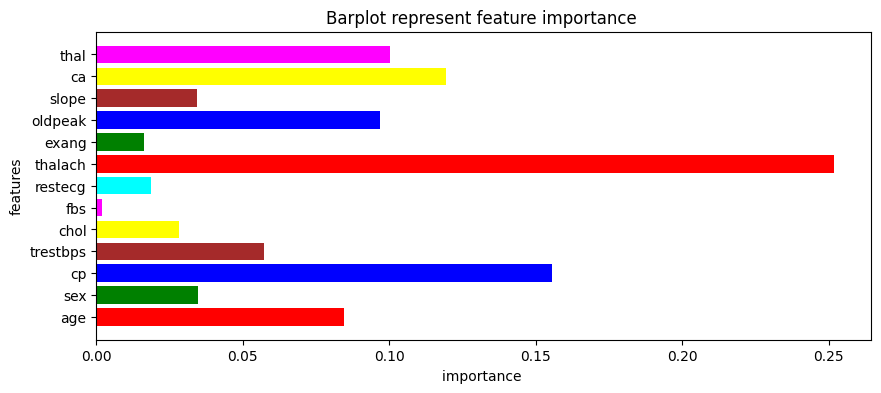

In [ ]:
colors = ["red", "green", "blue", "brown", "yellow", "magenta", "cyan"]
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': rf.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Barplot represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature [ 'Feature'], imp_feature [ 'Importance'], color = colors)
plt.show()

ROC CURVE

Accuracies of Model

In [ ]:
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest','adaboost classifier', 'K-Nearest Neighbour', 'Decision Tree', 'Support Vector Machine','Deep Learning Model ']
accuracy_scores = [lraccuracy,nbaccuracy,rfaccuracy,boostaccuracy,knnaccuracy,dtaccuracy,svmaccuracy,test_accuracy*100]
model_ev = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})
model_ev

,Model,Accuracy
0,Logistic Regression,84.806452
1,Naive Bayes,83.537634
2,Random Forest,77.623656
3,adaboost classifier,80.559140
4,K-Nearest Neighbour,61.064516
5,Decision Tree,76.279570
6,Support Vector Machine,82.881720
7,Deep Learning Model,85.245901


As a Chart

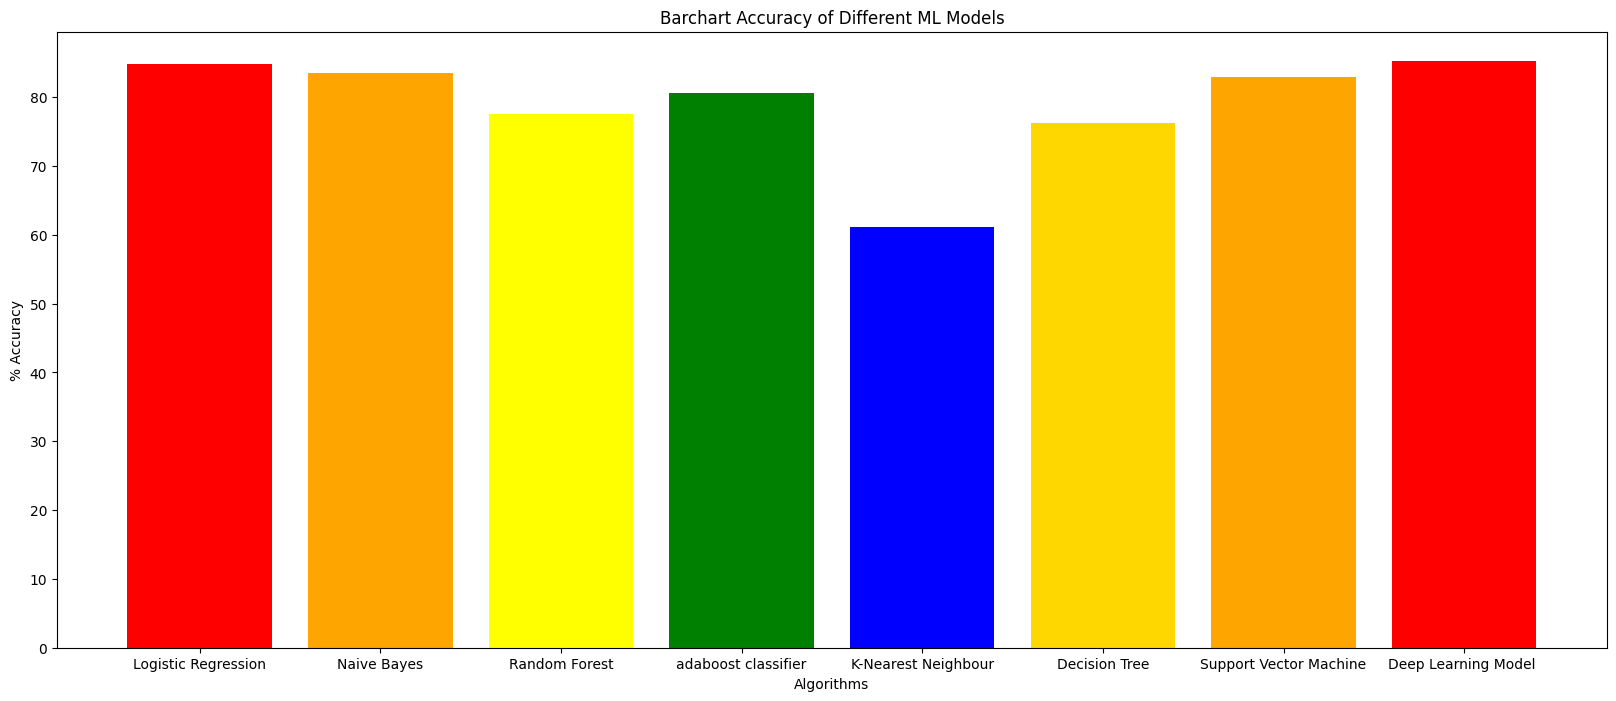

In [ ]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'gold', 'orange', ]
plt.figure(figsize=(20,8))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev ['Model'], model_ev['Accuracy'], color = colors)
plt.show()